## Nome: Nicholas Lima do Nascimento
## Matricula: 697

---

## **Atividade 5** - Localização e Refinamento de Raízes

## Funções Auxiliares

In [1]:
# Plotar gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Analise de dados
import numpy as np
import pandas as pd

### Função e Derivada da Função

In [2]:
def target_function(x):
    return x**3 - 2*x**2 - 3*x + 1

def derivative_function(x):
    return 3*x**2 - 4*x - 3

intervalo = [-5, 5]

### Método de Newton-Raphson

In [3]:
# implementa o processo de iteração usando a fórmula de Newton-Raphson
def newton_raphson_method(initial_guess, tolerance, max_iterations):
    """
    Aplica o método de Newton–Raphson para aproximar uma raiz de target_function(x).

    :param initial_guess: chute inicial x0
    :param tolerance: tolerância para parada (critério |f(x)| < tolerance)
    :param max_iterations: número máximo de iterações
    :return: raiz aproximada (float), número de iterações (int)
    """
    x_n = initial_guess
    for iteration in range(max_iterations):
        f_x = target_function(x_n)
        f_prime_x = derivative_function(x_n)

        # Evitar divisão por zero
        if f_prime_x == 0:
            print("A derivada é zero. Não é possível prosseguir.")
            return x_n, iteration + 1 # Retornar a aproximação atual e a contagem de iterações

        # Verificar convergência com base na tolerância
        if abs(f_x) < tolerance:
            return x_n, iteration + 1 # Retornar a raiz e a contagem de iterações

        x_n = x_n - f_x / f_prime_x

    # Se o número máximo de iterações for atingido sem convergência
    print("Número máximo de iterações atingido sem alcançar a tolerância desejada.")
    return x_n, max_iterations

---

## Parte Prática
No Inatel, os alunos de engenharia muitas vezes precisam analisar funções matemáticas para resolver problemas práticos, como verificar o comportamento de circuitos, sinais ou sistemas de controle. Encontrar as raízes de uma função é um passo importante nesses contextos, pois pode indicar pontos de equilíbrio, frequências de ressonância ou condições de operação de um sistema.

Seja a função
$f(x) = x^3 – 2x^2 – 3x + 1$.

Sabendo que esta função possui raízes no intervalo [−5,5], utilize o TEU com espaçamento de 1 para localizar os intervalos que contêm cada uma das raízes reais da função.

In [4]:
df = pd.DataFrame(columns=["x", "f(x)", "f1(x)"])
for x in range(intervalo[0], intervalo[1]+1):
    df = pd.concat([df, pd.DataFrame({"x": [x], "f(x)": [target_function(x)], "f1(x)": [derivative_function(x)]})]).reset_index(drop=True)

# print(df)
print(df.to_string(index=False))

 x f(x) f1(x)
-5 -159    92
-4  -83    61
-3  -35    36
-2   -9    17
-1    1     4
 0    1    -3
 1   -3    -4
 2   -5     1
 3    1    12
 4   21    29
 5   61    52


1. Utilizando o Teorema do Valor Intermediário (TEU) e espaçamento unitário no intervalo [−5,5], determine os subintervalos que contêm cada uma das raízes reais da função.

In [5]:
def mudou_sinal(fa, fb):
    # TEU: existe raiz em [a,b] se f é contínua e fa*fb < 0
    return fa * fb < 0

intervalos = []
chutes_iniciais = []
print(df.shape[0])

for x in range(df.shape[0]-1):
    # Pegando os valores para cada intervalo
    fa = df.loc[x, 'f(x)']
    fb = df.loc[x + 1, 'f(x)']
    
    # 1. Verificar se há mudança de sinal na função
    if mudou_sinal(fa, fb):
        a = df.loc[x, 'x']
        b = df.loc[x + 1, 'x']
        intervalos.append((a, b))
        
        # 2. Escolher os chutes iniciais para Newton-Raphson (utilize o ponto médio do intervalo)
        chute_inicial = (a + b) / 2  
        chutes_iniciais.append(chute_inicial)
        
    
print(f'Intervalos com raizes {intervalos}')
print(f'Chutes iniciais: {chutes_iniciais}')


11
Intervalos com raizes [(-2, -1), (0, 1), (2, 3)]
Chutes iniciais: [-1.5, 0.5, 2.5]


2. Identifique visualmente os pontos onde a curva cruza o eixo x e compare com os intervalos obtidos pelo TEU.

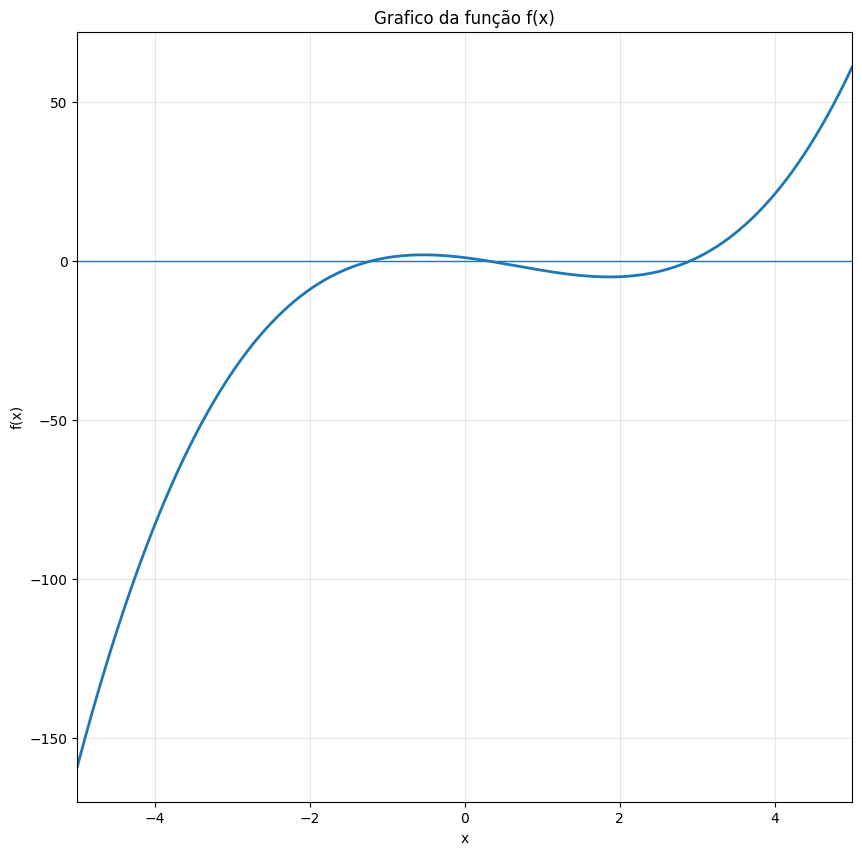

In [6]:

# Plote um gráfico de linhas que mostre a função.
def plot_function_and_roots(xmin, xmax, roots=None):
    """
    Plota target_function(x) no intervalo [xmin, xmax] e marca raízes (se fornecidas).
    :param xmin: limite inferior do eixo x
    :param xmax: limite superior do eixo x
    :param roots: lista de raízes para destacar (ex.: [root]) ou None
    :param titulo: título do gráfico
    """
    xs = np.linspace(xmin, xmax, 400)
    ys = [target_function(x) for x in xs]

    plt.figure(figsize=(10,10))
    plt.axhline(0, linewidth=1, label='X')        # eixo x
    plt.plot(xs, ys, linewidth=2, label='f(x) = x³ -2x² -3x + 1')      # f(x)

    if roots:
        for r in roots:
            plt.scatter([r], [target_function(r)], s=60, zorder=3)
            plt.axvline(r, linestyle='--', linewidth=1)
            plt.text(r, 0, f"{r:.4g}", ha='center', va='bottom')

    plt.xlim(xmin, xmax)
    plt.xlabel("x"); plt.ylabel("f(x)")
    plt.title("Grafico da função f(x)")
    plt.grid(True, alpha=0.3)
    plt.show()


plot_function_and_roots(-5,5)

3. Implemente o Método de Newton-Raphson nos pontos iniciais obtidos.

In [7]:
tolerancia = 1e-9
iteracao_max = 250

# Implementação do método consta nas funções auxiliares
for chute in chutes_iniciais:
    root, iteracoes = newton_raphson_method(chute, tolerance=tolerancia, max_iterations=iteracao_max)
    print(f'Para o chute {chute} a raiz aproximada é {root:.2f} em {iteracoes} iteracoes.')

Para o chute -1.5 a raiz aproximada é -1.20 em 5 iteracoes.
Para o chute 0.5 a raiz aproximada é 0.29 em 4 iteracoes.
Para o chute 2.5 a raiz aproximada é 2.91 em 6 iteracoes.


4. Implemente o Método de Bissecção

In [12]:
def bisseccao_method(a, b, tolerance, max_iterations):
    """
    Aplica o método da bissecção para aproximar uma raiz de target_function(x).

    :param a: limite inferior do intervalo
    :param b: limite superior do intervalo
    :param tolerance: tolerância para parada (|b-a| < tolerance)
    :param max_iterations: número máximo de iterações
    :return: raiz aproximada (float), número de iterações (int)
    """
    fa = target_function(a)
    fb = target_function(b)

    # Verifica se o intervalo inicial é válido
    if fa * fb >= 0:
        print("O metodo da Bisseccao pode nao convergir, pois nao ha mudança de sinal no intervalo")
        return None, 0

    x_n = a
    for iteration in range(max_iterations):
        x_n = (a + b) / 2
        f_xn = target_function(x_n)

        # Criterio de parada
        if abs(b - a) < tolerance:
            return x_n, iteration + 1

        # Reduz o intervalo
        if f_xn * fa < 0:
            b = x_n
        else:
            a = x_n
            fa = f_xn
    
    # Se o número máximo de iterações for atingido
    print("Número máximo de iterações atingido sem alcançar a tolerância desejada.")
    return x_n, max_iterations



tolerancia = 1e-9
iteracao_max = 250
print("Usando o metodo da bisseccao")
# Implementação do método consta nas funções auxiliares
for intervalo in intervalos:
    root, iteracoes = bisseccao_method(intervalo[0], intervalo[1], tolerance=tolerancia, max_iterations=iteracao_max)
    print(f'Para o chute {chute} a raiz aproximada é {root:.2f} em {iteracoes} iteracoes.')



Usando o metodo da bisseccao
Para o chute 2.5 a raiz aproximada é -1.20 em 31 iteracoes.
Para o chute 2.5 a raiz aproximada é 0.29 em 31 iteracoes.
Para o chute 2.5 a raiz aproximada é 2.91 em 31 iteracoes.


---
## Parte Teórica

1. Quais são as limitações do uso do TEU para encontrar raízes de funções?

Resposta: O teorema nao encontra todas as raizes e nao diz onde a raiz está, afirma apenas que existe raizes em dado intervalo. Sendo util para localização nao para refinamento.

2. Qual é a principal vantagem do método da bissecção em relação a outros métodos numéricos?

Resposta: Ele garante a convergência, com o intervalo sempre sendo reduzido para a metade a cada iteração

3. Em quais situações o método de Newton-Raphson pode falhar ou não convergir?

Resposta: Pode falhar se o chute inicial for muito ruim, podendo ocorrer problemas onde a derivada é 0 e funcoes que oscila muito, como um ruido sonoro.